Wstęp

Rynek walutowy (Forex) jest jednym z najbardziej płynnych, a zarazem zmiennych segmentów globalnego systemu finansowego. Dla polskiej gospodarki, charakteryzującej się wysokim stopniem otwartości, kursy walutowe – w szczególności USD/PLN oraz EUR/PLN – odgrywają kluczową rolę w kształtowaniu rentowności przedsiębiorstw, wartości zadłużenia zagranicznego oraz decyzji inwestycyjnych gospodarstw domowych. Ostatnia dekada (2015–2025) przyniosła szereg bezprecedensowych wydarzeń, takich jak pandemia COVID-19, wybuch wojny w Ukrainie czy globalny wzrost inflacji, które drastycznie wpłynęły na stabilność notowań złotego.

W warunkach tak dużej niepewności tradycyjne miary ryzyka, opierające się na założeniu stałej wariancji w czasie, okazują się niewystarczające. Szeregi czasowe finansowych stóp zwrotu rzadko zachowują się w sposób jednorodny; znacznie częściej obserwuje się zjawisko grupowania zmienności (ang. *volatility clustering*), gdzie po okresach dużych wahań następują kolejne okresy dużej zmienności, a po okresach spokoju – okresy wyciszenia.

**Cel badania**

Głównym celem niniejszego projektu jest modelowanie dynamiki zmienności oraz ocena ryzyka inwestycyjnego dla par walutowych USD/PLN i EUR/PLN w latach 2015–2025. Badanie ma na celu sprawdzenie, czy zastosowanie modelu klasy GARCH (uogólnionej autoregresyjnej warunkowej heteroskedastyczności) pozwala na poprawne odwzorowanie mechanizmu kształtowania się ryzyka na polskim rynku walutowym.

Realizacja celu głównego wymaga odpowiedzi na następujące **pytania badawcze**:

1. Czy w analizowanych szeregach czasowych stóp zwrotu występuje efekt ARCH (zależność zmienności bieżącej od zmienności historycznej), uzasadniający stosowanie modeli nieliniowych?  
2. W jakim stopniu szoki zewnętrzne (innowacje) wpływają na bieżącą zmienność kursów walut, a jak silna jest "pamięć" procesu zmienności (persystencja)?  
3. Która z analizowanych par walutowych charakteryzowała się wyższym ryzykiem inwestycyjnym (wyższą zmiennością warunkową) w badanym okresie dziesięcioletnim?

**Hipoteza badawcza**

***Szeregi stóp zwrotu kursów USD/PLN oraz EUR/PLN charakteryzują się występowaniem silnego efektu skupiania zmienności, a model AR(1)-GARCH(1,1) pozwala na efektywniejszy opis ryzyka kursowego niż metody zakładające homoskedastyczność rozkładu.***

**Zakres i metodyka**

Analiza empiryczna została przeprowadzona w oparciu o dzienne ceny zamknięcia (close) dla par walutowych USD/PLN oraz EUR/PLN z okresu od 2 stycznia 2015 roku do 12 grudnia 2025 roku, co daje łącznie 2831 obserwacji dla każdej zmiennej. Do weryfikacji hipotez wykorzystano model AR(1)-GARCH(1,1), estymowany metodą Największej Wiarygodności. Wybór tego narzędzia podyktowany jest jego zdolnością do jednoczesnego opisu średniej warunkowej (część AR) oraz wariancji warunkowej (część GARCH), co jest standardem w nowoczesnej ekonometrii finansowej.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller




## Łączenie dwóch plików

In [2]:

usd_df = pd.read_csv('usdpln_d.csv')
eur_df = pd.read_csv('eurpln_d.csv')

usd_df = usd_df[['Data', 'Zamkniecie']].rename(columns={'Zamkniecie': 'USD'})
eur_df = eur_df[['Data', 'Zamkniecie']].rename(columns={'Zamkniecie': 'EUR'})
df = pd.merge(usd_df, eur_df, on='Data', how='inner')

df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index('Data').sort_index()



## Stopy logarytmiczne

In [3]:
# 4. Obliczenie Logarytmicznych Stóp Zwrotu dla obu walut naraz
# Wzór: r_t = ln(P_t) - ln(P_{t-1})
df['r_USD'] = np.log(df['USD'] / df['USD'].shift(1))
df['r_EUR'] = np.log(df['EUR'] / df['EUR'].shift(1))

# Usuwamy pierwszy wiersz (NaN)
df = df.dropna()

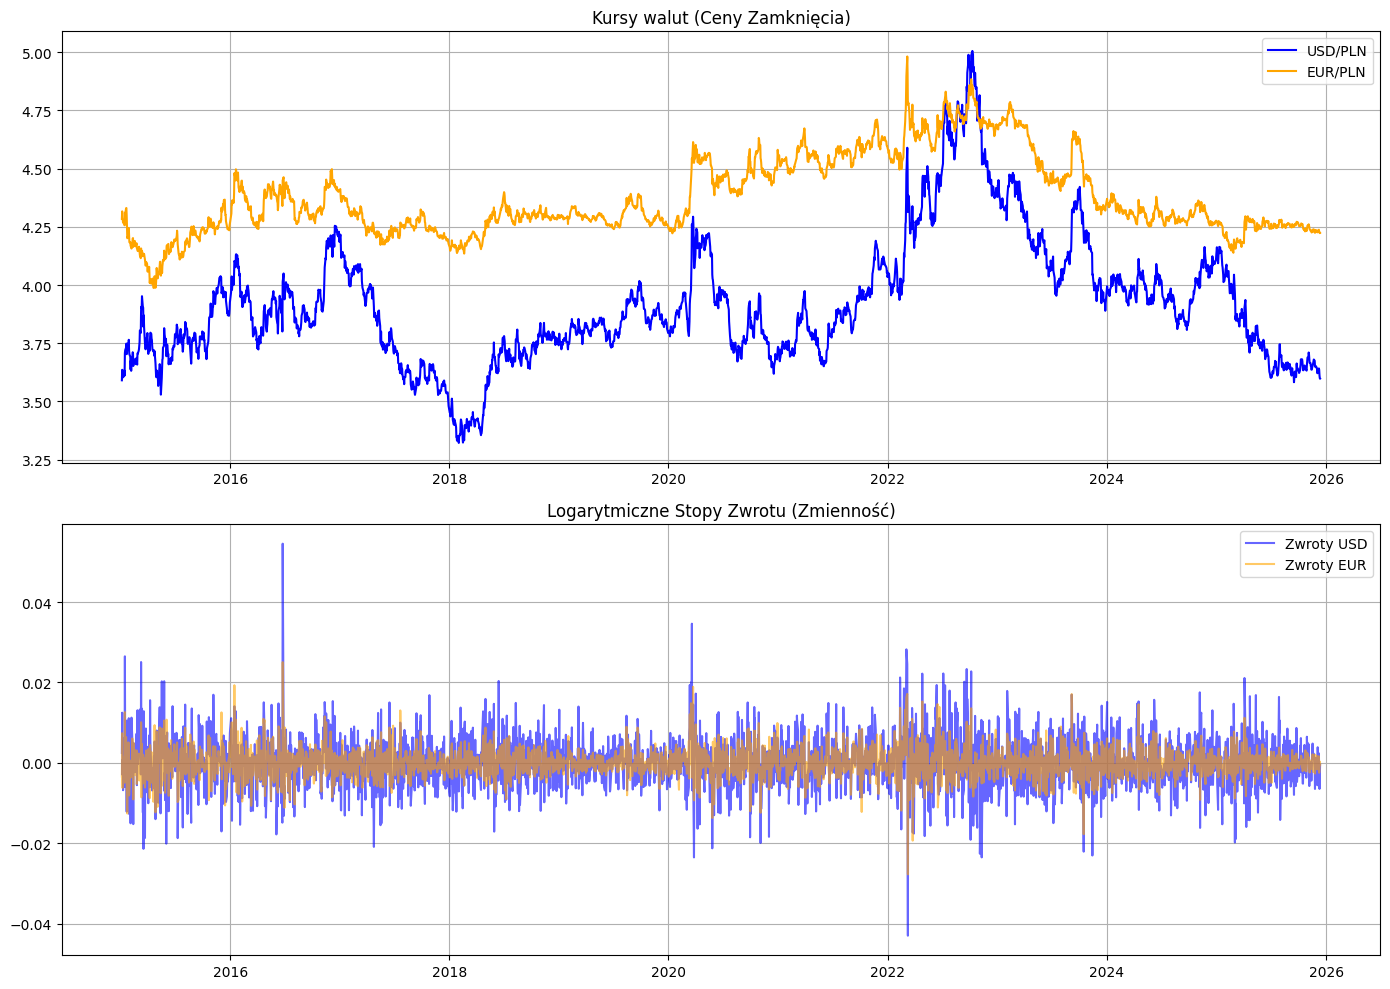

In [4]:

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(df['USD'], label='USD/PLN', color='blue')
plt.plot(df['EUR'], label='EUR/PLN', color='orange')
plt.title('Kursy walut (Ceny Zamknięcia)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df['r_USD'], label='Zwroty USD', color='blue', alpha=0.6)
plt.plot(df['r_EUR'], label='Zwroty EUR', color='orange', alpha=0.6)
plt.title('Logarytmiczne Stopy Zwrotu (Zmienność)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### tu będzie interpretacja

## Testy ADF + Jarque-Bera

In [5]:
import pandas as pd
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller

def analyze_timeseries(series, name):
    print(f"==================================================")
    print(f"ANALIZA DLA: {name}")
    print(f"==================================================")

    # --- 1. Statystyki Opisowe ---
    mean = series.mean()
    std = series.std()
    skew = series.skew()
    kurt = series.kurtosis() # W Pythonie to jest 'Excess Kurtosis' (nadwyżka).
                             # Dla rozkładu normalnego wynosi 0 (w definicji Fishera).
                             # Jeśli > 0, to mamy grube ogony (Leptokurtoza).

    print(f"1. STATYSTYKI OPISOWE:")
    print(f"   Średnia:           {mean:.6f}")
    print(f"   Odchylenie std.:   {std:.6f}")
    print(f"   Skośność (Skew):   {skew:.4f}")
    print(f"   Kurtoza (Excess):  {kurt:.4f}  <-- Szukamy wartości > 0 (grube ogony)")

    # --- 2. Test Jarque-Bera (Normalność) ---
    # H0: Rozkład jest normalny
    # H1: Rozkład NIE jest normalny
    jb_stat, jb_p_value = stats.jarque_bera(series)

    print(f"\n2. TEST JARQUE-BERA (Normalność):")
    print(f"   Statystyka JB:     {jb_stat:.2f}")
    print(f"   p-value:           {jb_p_value:.4e}")

    if jb_p_value < 0.05:
        print("   WNiOSEK: ODRZUCAMY H0. Rozkład NIE jest normalny (są grube ogony).")
        print("   -> To uzasadnia użycie modeli GARCH (fakt stylizowany potwierdzony).")
    else:
        print("   WNIOSEK: Brak podstaw do odrzucenia H0 (rozkład przypomina normalny).")

    # --- 3. Test ADF (Stacjonarność) ---
    # H0: Szereg jest NIEstacjonarny (ma pierwiastek jednostkowy)
    # H1: Szereg jest STACJONARNY
    adf_result = adfuller(series)
    adf_stat = adf_result[0]
    adf_p_value = adf_result[1]

    print(f"\n3. TEST ADF (Stacjonarność):")
    print(f"   Statystyka ADF:    {adf_stat:.4f}")
    print(f"   p-value:           {adf_p_value:.4e}")

    if adf_p_value < 0.05:
        print("   WNIOSEK: ODRZUCAMY H0. Szereg jest STACJONARNY (I(0)).")
        print("   -> Możemy bezpiecznie modelować ten szereg.")
    else:
        print("   WNIOSEK: Szereg jest NIESTACJONARNY! (Wymaga różnicowania).")
    print("\n")

# Uruchamiamy analizę dla obu walut
analyze_timeseries(df['r_USD'], "USD/PLN (Log-zwroty)")
analyze_timeseries(df['r_EUR'], "EUR/PLN (Log-zwroty)")

ANALIZA DLA: USD/PLN (Log-zwroty)
1. STATYSTYKI OPISOWE:
   Średnia:           0.000002
   Odchylenie std.:   0.006596
   Skośność (Skew):   0.2670
   Kurtoza (Excess):  3.2014  <-- Szukamy wartości > 0 (grube ogony)

2. TEST JARQUE-BERA (Normalność):
   Statystyka JB:     1236.24
   p-value:           3.5886e-269
   WNiOSEK: ODRZUCAMY H0. Rozkład NIE jest normalny (są grube ogony).
   -> To uzasadnia użycie modeli GARCH (fakt stylizowany potwierdzony).

3. TEST ADF (Stacjonarność):
   Statystyka ADF:    -13.9338
   p-value:           5.0346e-26
   WNIOSEK: ODRZUCAMY H0. Szereg jest STACJONARNY (I(0)).
   -> Możemy bezpiecznie modelować ten szereg.


ANALIZA DLA: EUR/PLN (Log-zwroty)
1. STATYSTYKI OPISOWE:
   Średnia:           -0.000006
   Odchylenie std.:   0.003710
   Skośność (Skew):   0.2503
   Kurtoza (Excess):  4.0761  <-- Szukamy wartości > 0 (grube ogony)

2. TEST JARQUE-BERA (Normalność):
   Statystyka JB:     1979.68
   p-value:           0.0000e+00
   WNiOSEK: ODRZUCAMY H0.